<a href="https://colab.research.google.com/github/Ajjme/Feedback_Systems/blob/main/Naked_Planet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Outline of goals

The goal is to numerically simulate how the planetary temperature of a naked planet would change through time as it approaches equilibrium (the state at which it stops changing, which we calculated before).  The planet starts with some initial temperature.  The “heat capacity” (units of Joules / m2 K) of the planet is set by a layer of water which absorbs heat and changes its temperature.  If the layer is very thick, it takes a lot more heat (Joules) to change the temperature. The differential equation you are going to solve is

dHeatContent/dt = L*(1-alpha)/4 - epsilon * sigma * T^4

where the heat content is related to the temperature by the heat capacity   

T[K] = HeatContent [J/m2] / HeatCapacity [J/m2 K]

The numerical method is to take time steps, extrapolating the heat content from one step to the next using the incoming and outgoing heat fluxes, same as you would balance a bank account by adding all the income and subtracting all the expenditures over some time interval like a month.  The heat content "jumps" from the value at the beginning of the time step, to the value at the end, by following the equation

HeatContent(t+1) = HeatContent(t) + dHeatContent/dT * TimeStep

timeStep = 100           # years
waterDepth = 4000        # meters
L = 1350                 # Watts/m2
albedo = 0.3
epsilon = 1
sigma = 5.67E-8          # W/m2 K4

In [ ]:
import numpy
import matplotlib.pyplot

temperature and the heat content are related to each other by means of the heat capacity

Enter number of time steps to simulate: 10
100 0.0 0.0
200 44.15624999999999 0.21555186906704765
300 88.2722123292339 3.442540862251764
400 131.7850350490273 17.102021361091836
500 172.74483581844225 50.489765216037654
600 207.4643082721114 105.04046322600912
700 231.98799550248825 164.22720756407347
800 245.4493983744412 205.79316507189245
900 251.14192585505177 225.55888546167517
1000 253.1401460723339 232.82368803549306


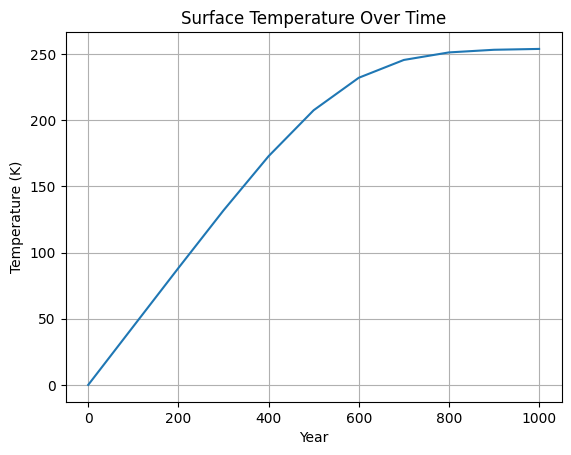

Final temperature: 253.78054009427152
Final heat out: 232.82368803549306


In [ ]:
import matplotlib.pyplot as plt

class ClimateModel:
    def __init__(self, time_step=100, water_depth=4000, L=1350, albedo=0.3,
                 epsilon=1.0, sigma=5.67E-8):
        # Constants
        self.time_step = time_step            # Total simulation time in years
        self.water_depth = water_depth        # Water depth in meters
        self.L = L                            # Solar constant (W/m²)
        self.albedo = albedo                  # Albedo
        self.epsilon = epsilon                # Emissivity
        self.sigma = sigma                    # Stefan-Boltzmann constant

        # Derived quantities
        self.heat_capacity = self.water_depth * 4.2E6  # J/K/m²
        self.heatin = self.L * (1 - self.albedo) / 4   # Incoming heat flux (W/m²)

        # State variables
        self.time_years = [0]
        self.TK = [0.0]  # Temperature in Kelvin
        self.heat_content = self.heat_capacity * self.TK[0]
        self.heatout = 0.0

    def step(self):
        """Advance the simulation by one time step."""
        next_time = self.time_step + self.time_years[-1]
        self.heatout = self.epsilon * self.sigma * pow(self.TK[-1], 4)
        print(next_time, self.TK[-1], self.heatout)

        # Update heat content and temperature
        self.heat_content += (self.heatin - self.heatout) * self.time_step * 3.14E7
        next_temp = self.heat_content / self.heat_capacity

        self.time_years.append(next_time)
        self.TK.append(next_temp)

    def run(self, steps=None):
        """Run the simulation."""
        if steps is None:
            steps = self.time_step

        for _ in range(steps):
            self.step()

    def plot_temperature(self):
        """Plot temperature over time."""
        plt.plot(self.time_years, self.TK)
        plt.xlabel("Year")
        plt.ylabel("Temperature (K)")
        plt.title("Surface Temperature Over Time")
        plt.grid(True)
        plt.show()

    def final_state(self):
        """Return the final temperature and outgoing heat."""
        return self.TK[-1], self.heatout


# Run model
if __name__ == "__main__":
    model = ClimateModel()

    try:
        n_steps = int(input("Enter number of time steps to simulate: "))
    except ValueError:
        n_steps = 100  # default if user enters invalid input

    model.run(n_steps)
    model.plot_temperature()

    final_temp, final_heatout = model.final_state()
    print("Final temperature:", final_temp)
    print("Final heat out:", final_heatout)


100 0.0 0.0
200 44.15624999999999 0.21555186906704765
300 88.2722123292339 3.442540862251764
400 131.7850350490273 17.102021361091836
500 172.74483581844225 50.489765216037654
600 207.4643082721114 105.04046322600912
700 231.98799550248825 164.22720756407347
800 245.4493983744412 205.79316507189245
900 251.14192585505177 225.55888546167517
1000 253.1401460723339 232.82368803549306
1100 253.78054009427152 235.18863315833954
1200 253.97891461110567 235.92486240915517
1300 254.03968437510878 236.1507432816602
1400 254.05823592841753 236.2197316056644
1500 254.06389323545406 236.24077264269152
1600 254.06561787247483 236.24718730832097
1700 254.0661435779434 236.24914265867207
1800 254.06630381912015 236.2497386747474
1900 254.06635266205427 236.24992034596593
2000 254.06636754977254 236.249975720832
2100 254.06637208766466 236.24999259952307
2200 254.06637347084902 236.24999774427786
2300 254.06637389245424 236.24999931243866
2400 254.0663740209627 236.24999979042602
2500 254.066374060133

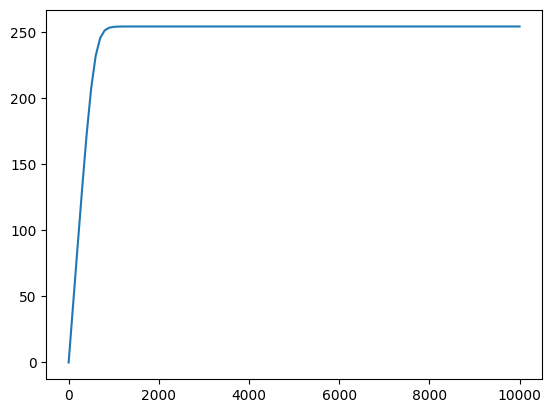

In [ ]:
# provided Code

# Define Constants
TIME_STEP = 100             # years
WATER_DEPTH = 4000          # meters
L = 1350                    # Watts/m2
ALBEDO = 0.3                # solar constant
EPSILON = 1                 # emissivity
SIGMA = 5.67E-8             # W/m2 K4

heatCapacity = WATER_DEPTH * 4.2E6
timeYears = [0]
TK = [0.]
heatContent = heatCapacity * TK[0]
heatin = L * (1-ALBEDO)/4
heatOut = 0

for itime in range(0, TIME_STEP):
  timeYears.append(TIME_STEP + timeYears[-1])
  heatOut = EPSILON * SIGMA * pow(TK[-1],4)
  print(timeYears[-1], TK[-1],heatOut)
  heatContent = heatContent + (heatin - heatOut) * TIME_STEP * 3.14E7
  TK.append(heatContent / heatCapacity)

plt.plot(timeYears, TK)
plt.show

nSteps = int(input(""))
print(TK[-1], heatOut)

1
0 0 0


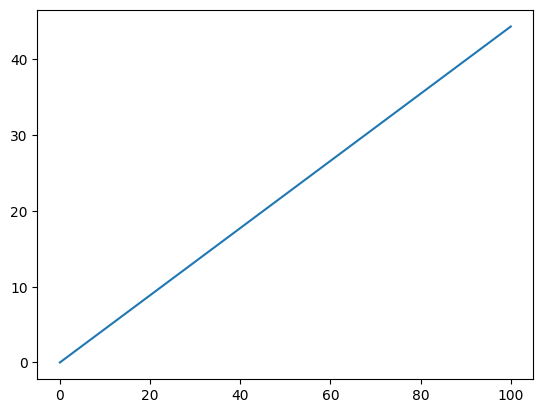

In [ ]:
#Simplifed framework


# Define Constants
TIME_STEP = 100             # years
WATER_DEPTH = 4000          # meters
L = 1350                    # Watts/m2
ALBEDO = 0.3                # solar constant
EPSILON = 1                 # emissivity
SIGMA = 5.67E-8             # W/m2 K4
HEAT_CAPACITY = 1000 * 4200 * WATER_DEPTH


def create_temperature_time_plot(nSteps):

    # Initialize time, heat content, heat in & out, and heat flux lists.
    time_list = [0]
    heat_content_list = [0]
    temperature_list = [0]
    heat_in = [L * (1 - ALBEDO) / 4]
    heat_out = [0]
    heat_flux = [(heat_in[-1] - heat_out[-1]) * 60 * 60 * 24 * 365]

    # Make N steps where each step is apart by TIME_STEP years.
    # Calculate new heat content, temperature, incoming & outgoing heat flux for every step.
    for i in range(1, nSteps + 1):
        new_heat_content = heat_content_list[i - 1] + heat_flux[-1] * TIME_STEP
        new_temperature = new_heat_content / HEAT_CAPACITY
        print(time_list[-1], temperature_list[-1],heat_out[-1])
        outgoing_heat_flux = EPSILON * SIGMA * pow(new_temperature, 4)
        incoming_heat_flux = (L * (1 - ALBEDO)) / 4
        new_heat_flux = (incoming_heat_flux - outgoing_heat_flux) * 60 * 60 * 24 * 365

        time_list.append(time_list[i - 1] + TIME_STEP)
        heat_content_list.append(new_heat_content)
        temperature_list.append(new_temperature)
        heat_out.append(outgoing_heat_flux)
        heat_in.append(incoming_heat_flux)
        heat_flux.append(new_heat_flux)

    # Create a static plot.
    plt.plot(time_list, temperature_list)
    plt.show()


if __name__ == '__main__':
    nSteps = int(input(""))
    create_temperature_time_plot(nSteps)

2 0.0 0.0
4 3532.4999999999995 8829004.556986272
-132007574.56636617 8829004.556986272


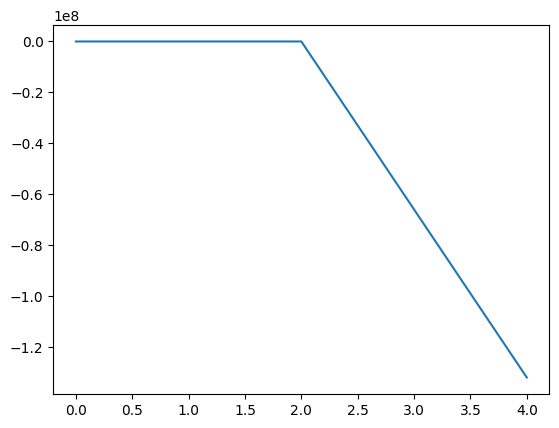

In [ ]:
# provided Code

# Define Constants
TIME_STEP = 2            # years
WATER_DEPTH = 1         # meters
L = 1350                    # Watts/m2
ALBEDO = 0.3                # solar constant
EPSILON = 1                 # emissivity
SIGMA = 5.67E-8             # W/m2 K4

heatCapacity = WATER_DEPTH * 4.2E6
timeYears = [0]
TK = [0.] #initial temp
heatContent = heatCapacity * TK[0]
heatin = L * (1-ALBEDO)/4
heatOut = 0

for itime in range(0, TIME_STEP):
  timeYears.append(TIME_STEP + timeYears[-1])
  heatOut = EPSILON * SIGMA * pow(TK[-1],4)
  print(timeYears[-1], TK[-1],heatOut)
  heatContent = heatContent + (heatin - heatOut) * TIME_STEP * 3.14E7
  TK.append(heatContent / heatCapacity)

plt.plot(timeYears, TK)
plt.show

print(TK[-1], heatOut)